# Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Загрузка датасета и первичный анализ

In [2]:
import kagglehub

path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")
print("Path to dataset files:", path)

100%|██████████| 2.44M/2.44M [00:01<00:00, 1.94MB/s]

Extracting files...
Path to dataset files: /Users/anchar/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [4]:
df = pd.read_csv(f"{path}/AB_NYC_2019.csv")

In [5]:
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nСтатистическое описание числовых признаков:")
display(df.describe())

Размер датасета: (48895, 16)

Первые 5 строк:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review']
target = 'price'
df_clean = df.drop(columns=columns_to_drop)

print("\nИнформация о данных:")
df_clean.info()

print("\nСтатистическое описание числовых признаков:")
display(df_clean.describe())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB

Статистическо

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
print("\nПропущенные значения:")
missing_data = df_clean.isnull().sum()
print(missing_data[missing_data > 0])


Пропущенные значения:
reviews_per_month    10052
dtype: int64


### Результаты первичного анализа

1. В датасете 16 полей, часть из которых могут быть удалены, так как предположительно не несут информацию, нужную для постороения модели. Поля, которые можно убрать:
- идентификаторы id и host_id
- имена name и host_name
- last_review
2. В датасете есть пропуски (reviews_per_month), которые требуется обработать
3. Масшаб параметров имеет достаточно большой разбег, поэтому лучше применить scale

# Более подробный анализ данных с помощью визуализации


Распределение числовых признаков



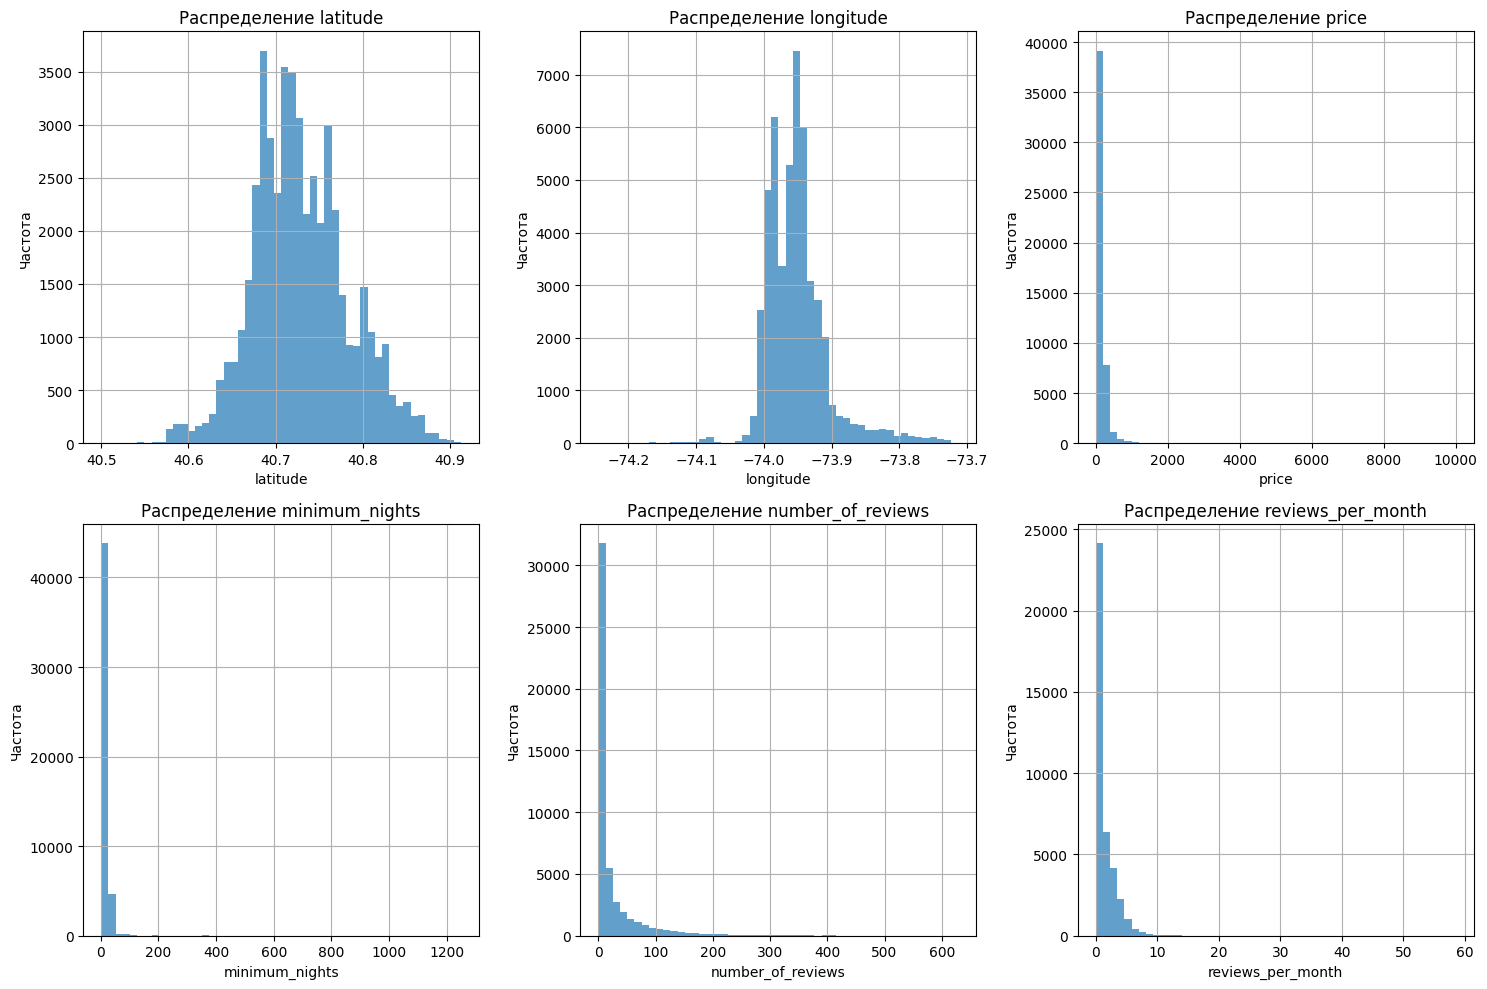

In [8]:

numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        df_clean[col].hist(bins=50, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')

print("\nРаспределение числовых признаков\n")
plt.tight_layout()
plt.show()


Оценка разброса числовых признаков



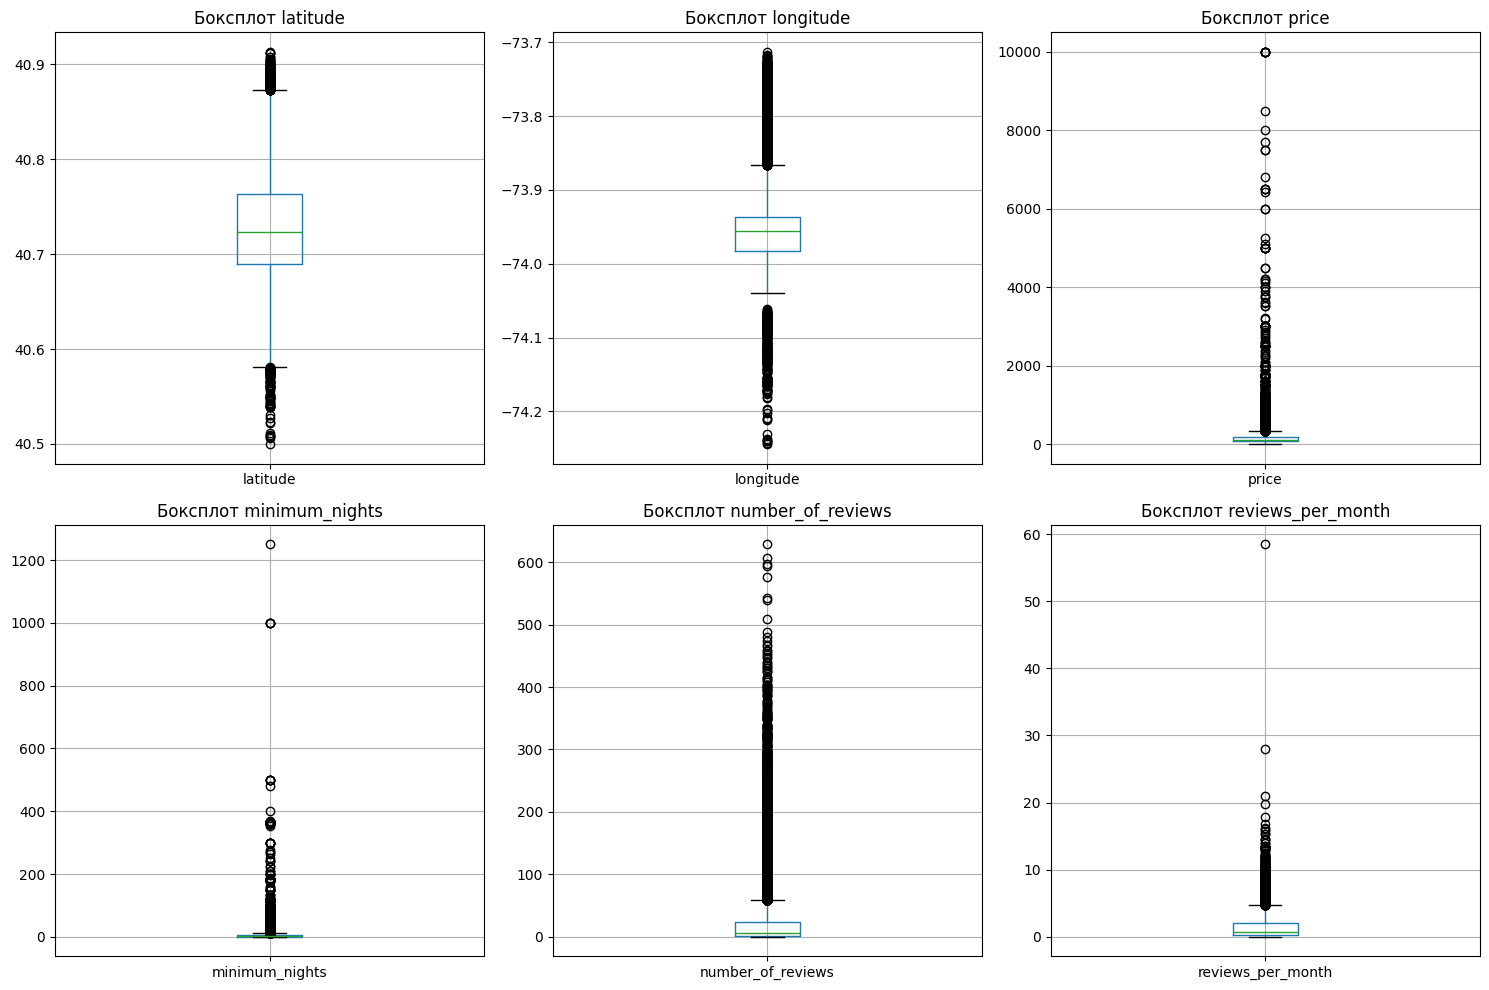

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        df_clean.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Боксплот {col}')

print("\nОценка разброса числовых признаков\n")
plt.tight_layout()
plt.show()

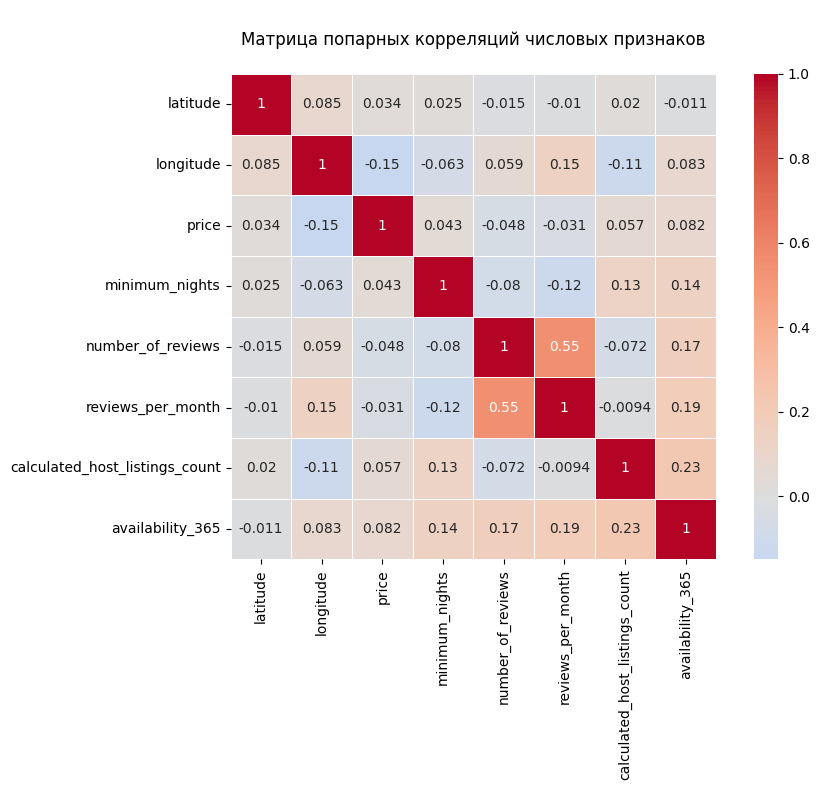

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title("\nМатрица попарных корреляций числовых признаков\n")
plt.tight_layout()
plt.show()


Категориальные признаки: ['neighbourhood_group', 'neighbourhood', 'room_type']



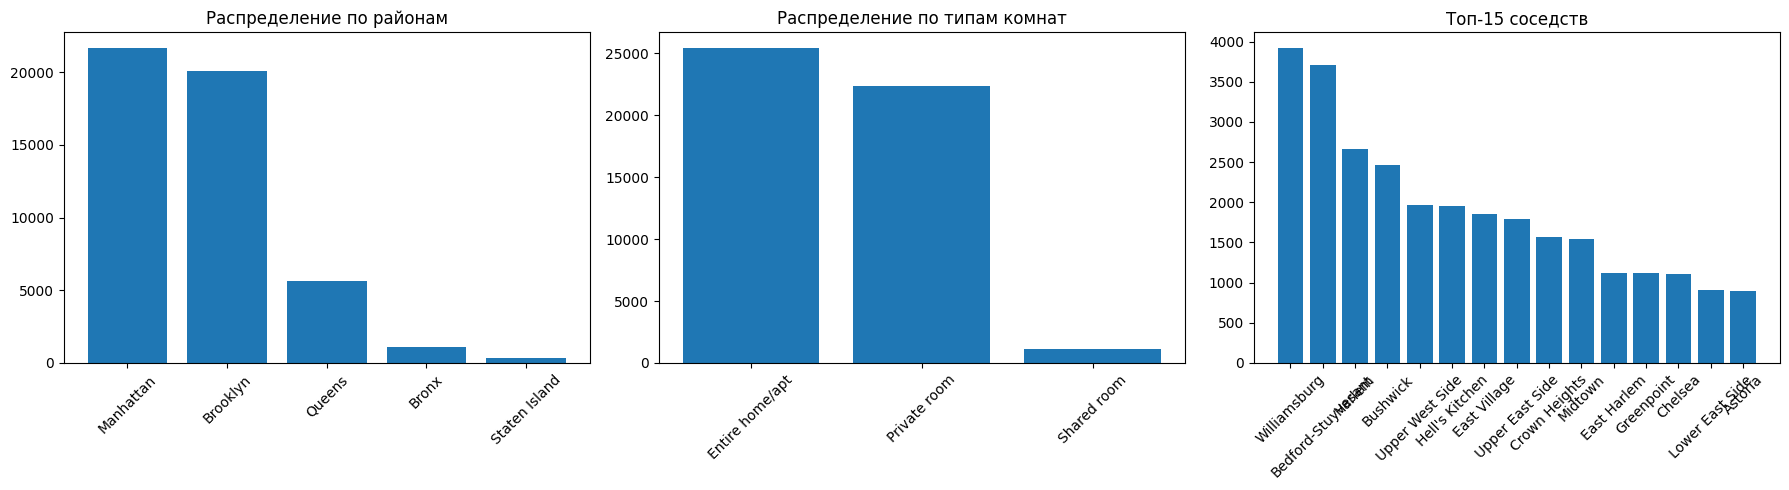

In [11]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

neighbourhood_counts = df_clean['neighbourhood_group'].value_counts()
axes[0].bar(neighbourhood_counts.index, neighbourhood_counts.values)
axes[0].set_title('Распределение по районам')
axes[0].tick_params(axis='x', rotation=45)

room_type_counts = df_clean['room_type'].value_counts()
axes[1].bar(room_type_counts.index, room_type_counts.values)
axes[1].set_title('Распределение по типам комнат')
axes[1].tick_params(axis='x', rotation=45)

neighbourhood_top = df_clean['neighbourhood'].value_counts().head(15)
axes[2].bar(neighbourhood_top.index, neighbourhood_top.values)
axes[2].set_title('Топ-15 соседств')
axes[2].tick_params(axis='x', rotation=45)

print(f"\nКатегориальные признаки: {categorical_columns}\n")
plt.tight_layout()
plt.show()

### Результаты визуального анализа

1. Требуется учеть выбросы по таргету (price)
2. Сильных (>0.8) корреляций не выявлено

# Модификация датасета

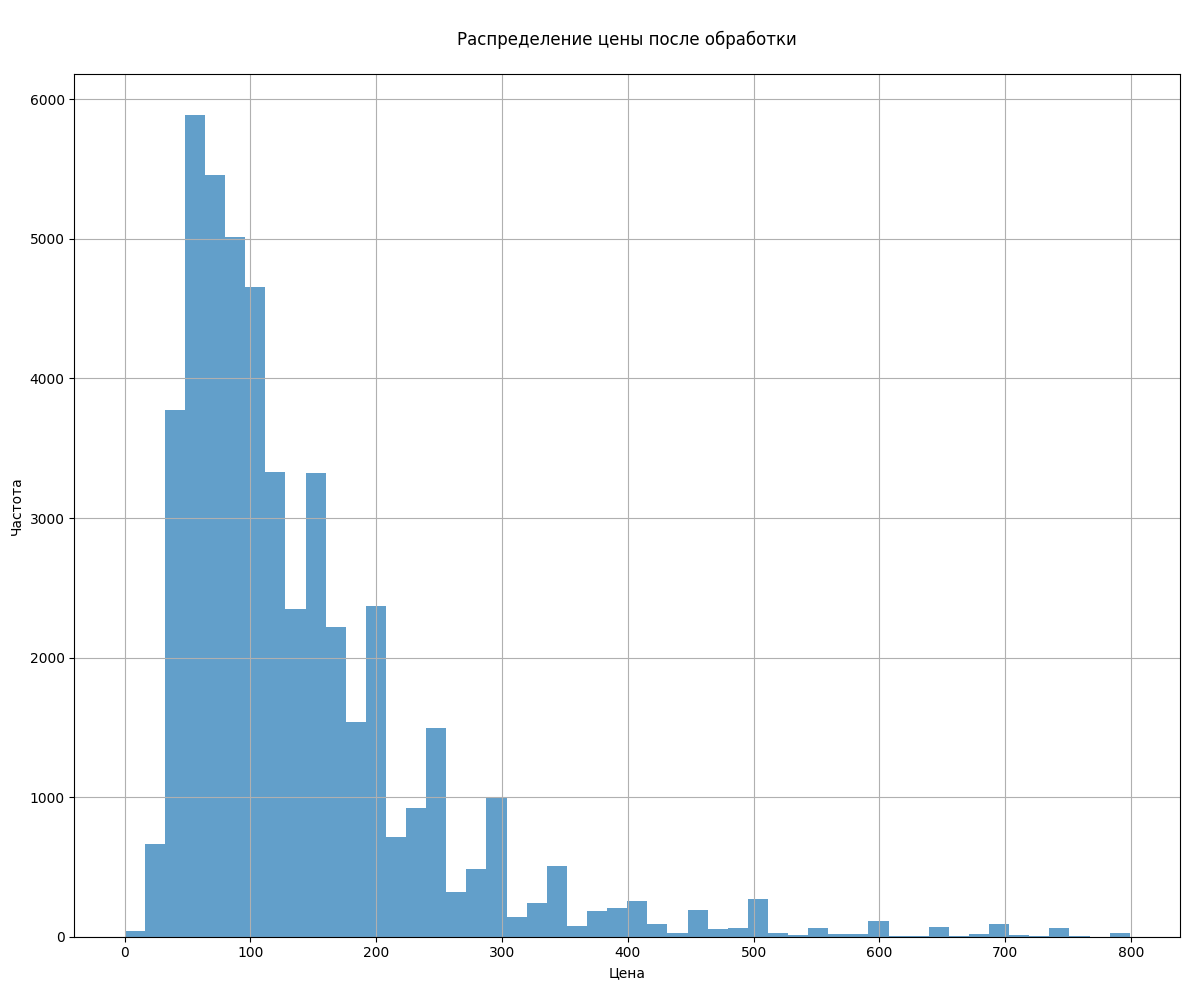

In [12]:
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)
price_q99 = df_clean['price'].quantile(0.99)
df_clean = df_clean[df_clean['price'] <= price_q99]

df_encoded = pd.get_dummies(df_clean, columns=['neighbourhood_group', 'room_type'], prefix=['district', 'room'])

le = LabelEncoder()
df_encoded['neighbourhood_encoded'] = le.fit_transform(df_encoded['neighbourhood'])
df_encoded = df_encoded.drop('neighbourhood', axis=1)

scaler = StandardScaler()
numerical_to_scale = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df_encoded[numerical_to_scale] = scaler.fit_transform(df_encoded[numerical_to_scale])

plt.figure(figsize=(12, 10))

df_encoded['price'].hist(bins=50, alpha=0.7)
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.title('\nРаспределение цены после обработки\n')
plt.tight_layout()
plt.show()


### результаты модификации датасета

1. Убраны записи с незаполненным reviews_per_month 
2. Убраны записи с выбросами (больше 99 персентиля) по таргету
3. Для числовых полей применен StandartScaler

# Добавление параметров в датасет

In [13]:
# Используем координаты Таймс-сквер как центральную точку Манхэттена
MANHATTAN_CENTER = (40.7580, -73.9855)  # (latitude, longitude) для Times Square

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def manhattan_distance(lat1, lon1, lat2, lon2):
    return abs(lat1 - lat2) + abs(lon1 - lon2)

df_encoded['euclidean_dist_to_manhattan'] = df_encoded.apply(
    lambda row: euclidean_distance(
        row['latitude'], 
        row['longitude'], 
        MANHATTAN_CENTER[0], 
        MANHATTAN_CENTER[1]
    ), axis=1
)

df_encoded['manhattan_dist_to_manhattan'] = df_encoded.apply(
    lambda row: manhattan_distance(
        row['latitude'], 
        row['longitude'], 
        MANHATTAN_CENTER[0], 
        MANHATTAN_CENTER[1]
    ), axis=1
)

new_numerical_features = [
    'euclidean_dist_to_manhattan',
    'manhattan_dist_to_manhattan'
]
scaler_new = StandardScaler()
df_encoded[new_numerical_features] = scaler_new.fit_transform(df_encoded[new_numerical_features])


### Результаты добавление параметров

Добавлен параметр "расстояние до Манхэттена" вычисленный по двум метрикам

# Построение моделей
#### Разделение данных

In [14]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('price', axis=1) 
y = df_encoded['price'] 

print(f"\nРазмерность признаков (X): {X.shape}")
print(f"Размерность целевой переменной (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

print(f"\nРазделение данных:")
print(f"Тренировочная выборка: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Тестовая выборка: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


Размерность признаков (X): (48421, 18)
Размерность целевой переменной (y): (48421,)

Разделение данных:
Тренировочная выборка: 33894 samples (70.0%)
Тестовая выборка: 14527 samples (30.0%)


#### Функция для оценки и вывода метрик для разных моделей

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Оценка модели и вывод метрик"""
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'MAE_train': mean_absolute_error(y_train, y_train_pred),
        'MAE_test': mean_absolute_error(y_test, y_test_pred),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2_train': r2_score(y_train, y_train_pred),
        'R2_test': r2_score(y_test, y_test_pred),
    }
    
    print(f"\n{model_name}:")
    print("-" * 40)
    print(f"Тренировочная выборка:")
    print(f"  MAE: ${metrics['MAE_train']:.2f}")
    print(f"  RMSE: ${metrics['RMSE_train']:.2f}")
    print(f"  R²: {metrics['R2_train']:.4f}")
    
    print(f"\nТестовая выборка:")
    print(f"  MAE: ${metrics['MAE_test']:.2f}")
    print(f"  RMSE: ${metrics['RMSE_test']:.2f}")
    print(f"  R²: {metrics['R2_test']:.4f}")
    
    overfit_mae = abs(metrics['MAE_train'] - metrics['MAE_test']) / metrics['MAE_test'] * 100
    overfit_r2 = abs(metrics['R2_train'] - metrics['R2_test']) / abs(metrics['R2_test']) * 100
    
    print(f"\nРазница train/test:")
    print(f"  MAE разница: {overfit_mae:.1f}%")
    print(f"  R² разница: {overfit_r2:.1f}%")
    
    return model, metrics, y_test_pred

#### Результаты для линейной регрессии, Ridge (c CV), Lasso (c CV), ElasticNet (c CV)

In [16]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

results = {}

# Простая линейная регрессия
print("\n" + "="*60)
linear_model = LinearRegression()
linear_model, linear_metrics, linear_pred = evaluate_model(
    linear_model, X_train, X_test, y_train, y_test, "ЛИНЕЙНАЯ РЕГРЕССИЯ"
)
results['Linear'] = linear_metrics





ЛИНЕЙНАЯ РЕГРЕССИЯ:
----------------------------------------
Тренировочная выборка:
  MAE: $52.02
  RMSE: $82.61
  R²: 0.3657

Тестовая выборка:
  MAE: $51.72
  RMSE: $82.52
  R²: 0.3694

Разница train/test:
  MAE разница: 0.6%
  R² разница: 1.0%


In [17]:
# Определяем диапазон альфа значений для Ridge
alphas_ridge = np.logspace(-3, 3, 50)
ridge_model = RidgeCV(
    alphas=alphas_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
)
ridge_model, ridge_metrics, ridge_pred = evaluate_model(
    ridge_model, X_train, X_test, y_train, y_test, "RIDGE РЕГРЕССИЯ (CV)"
)
results['Ridge'] = ridge_metrics




RIDGE РЕГРЕССИЯ (CV):
----------------------------------------
Тренировочная выборка:
  MAE: $52.02
  RMSE: $82.61
  R²: 0.3657

Тестовая выборка:
  MAE: $51.72
  RMSE: $82.52
  R²: 0.3694

Разница train/test:
  MAE разница: 0.6%
  R² разница: 1.0%


In [18]:
# Lasso регрессия с кросс-валидацией
alphas_lasso = np.logspace(-4, 0, 50)
lasso_model = LassoCV(
    alphas=alphas_lasso,
    cv=5,
    max_iter=500000, # 10000 было мало, появлялась ошибка 
    #ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.242e+05, tolerance: 2.899e+04
  #model = cd_fast.enet_coordinate_descent_gram
    random_state=42
)
lasso_model, lasso_metrics, lasso_pred = evaluate_model(
    lasso_model, X_train, X_test, y_train, y_test, "LASSO РЕГРЕССИЯ (CV)"
)
results['Lasso'] = lasso_metrics



LASSO РЕГРЕССИЯ (CV):
----------------------------------------
Тренировочная выборка:
  MAE: $52.02
  RMSE: $82.61
  R²: 0.3657

Тестовая выборка:
  MAE: $51.72
  RMSE: $82.52
  R²: 0.3694

Разница train/test:
  MAE разница: 0.6%
  R² разница: 1.0%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+08, tolerance: 3.647e+04
  model = cd_fast.enet_coordinate_descent(


In [20]:
# ElasticNet регрессия с кросс-валидацией
elastic_model = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    alphas=np.logspace(-4, 0, 30),
    cv=5,
    max_iter=1000000,
    random_state=42
)
elastic_model, elastic_metrics, elastic_pred = evaluate_model(
    elastic_model, X_train, X_test, y_train, y_test, "ELASTICNET РЕГРЕССИЯ (CV)"
)
results['ElasticNet'] = elastic_metrics


ELASTICNET РЕГРЕССИЯ (CV):
----------------------------------------
Тренировочная выборка:
  MAE: $52.02
  RMSE: $82.61
  R²: 0.3657

Тестовая выборка:
  MAE: $51.72
  RMSE: $82.52
  R²: 0.3694

Разница train/test:
  MAE разница: 0.6%
  R² разница: 1.0%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+08, tolerance: 3.647e+04
  model = cd_fast.enet_coordinate_descent(



Сравнительная таблица моделей:


,R2_test,R2_train,RMSE_test,RMSE_train,MAE_test,MAE_train
Linear,0.3694,0.3657,82.5196,82.6125,51.7179,52.0173
Ridge,0.3694,0.3657,82.5197,82.6126,51.7172,52.0167
Lasso,0.3694,0.3657,82.5196,82.6125,51.7173,52.0168
ElasticNet,0.3694,0.3657,82.5196,82.6125,51.7173,52.0167


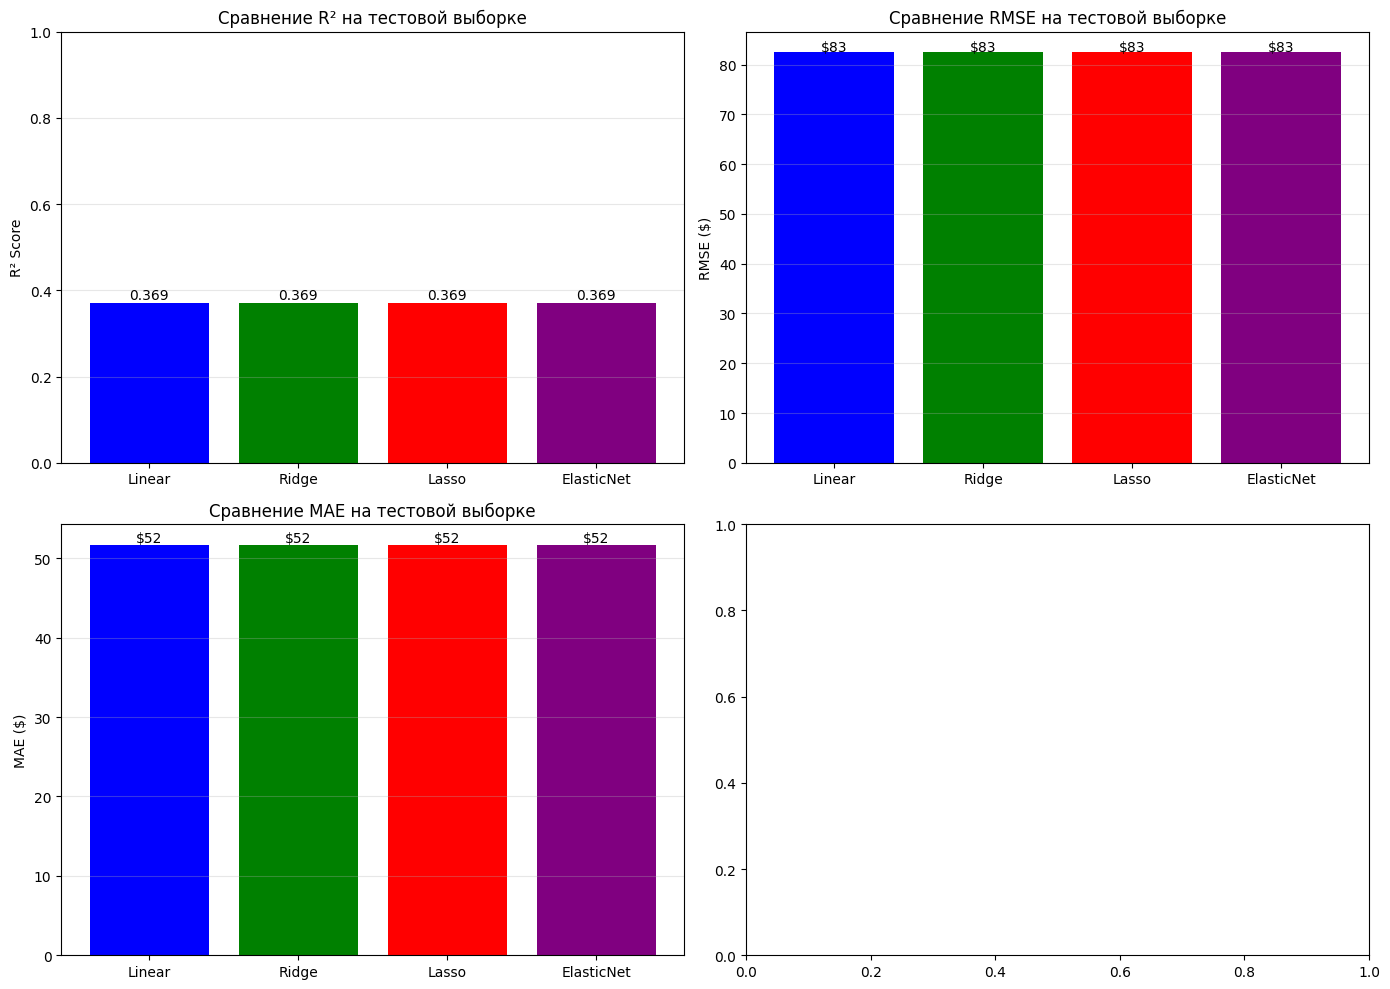


Лучшая модель по метрикам: Linear



In [21]:

comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['R2_test', 'R2_train', 'RMSE_test', 'RMSE_train', 'MAE_test', 'MAE_train']]

print("\nСравнительная таблица моделей:")
display(comparison_df.round(4))
print("\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(comparison_df.index, comparison_df['R2_test'], color=['blue', 'green', 'red', 'purple'])
axes[0, 0].set_title('Сравнение R² на тестовой выборке')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(comparison_df['R2_test']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

axes[0, 1].bar(comparison_df.index, comparison_df['RMSE_test'], color=['blue', 'green', 'red', 'purple'])
axes[0, 1].set_title('Сравнение RMSE на тестовой выборке')
axes[0, 1].set_ylabel('RMSE ($)')
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(comparison_df['RMSE_test']):
    axes[0, 1].text(i, v + 0.3, f'${v:.0f}', ha='center')

axes[1, 0].bar(comparison_df.index, comparison_df['MAE_test'], color=['blue', 'green', 'red', 'purple'])
axes[1, 0].set_title('Сравнение MAE на тестовой выборке')
axes[1, 0].set_ylabel('MAE ($)')
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(comparison_df['MAE_test']):
    axes[1, 0].text(i, v + 0.3, f'${v:.0f}', ha='center')

plt.tight_layout()
plt.show()

best_model_name = comparison_df['R2_test'].idxmax()
print(f"\nЛучшая модель по метрикам: {best_model_name}\n")

# Анализ важности признаков


ВАЖНОСТЬ ПРИЗНАКОВ


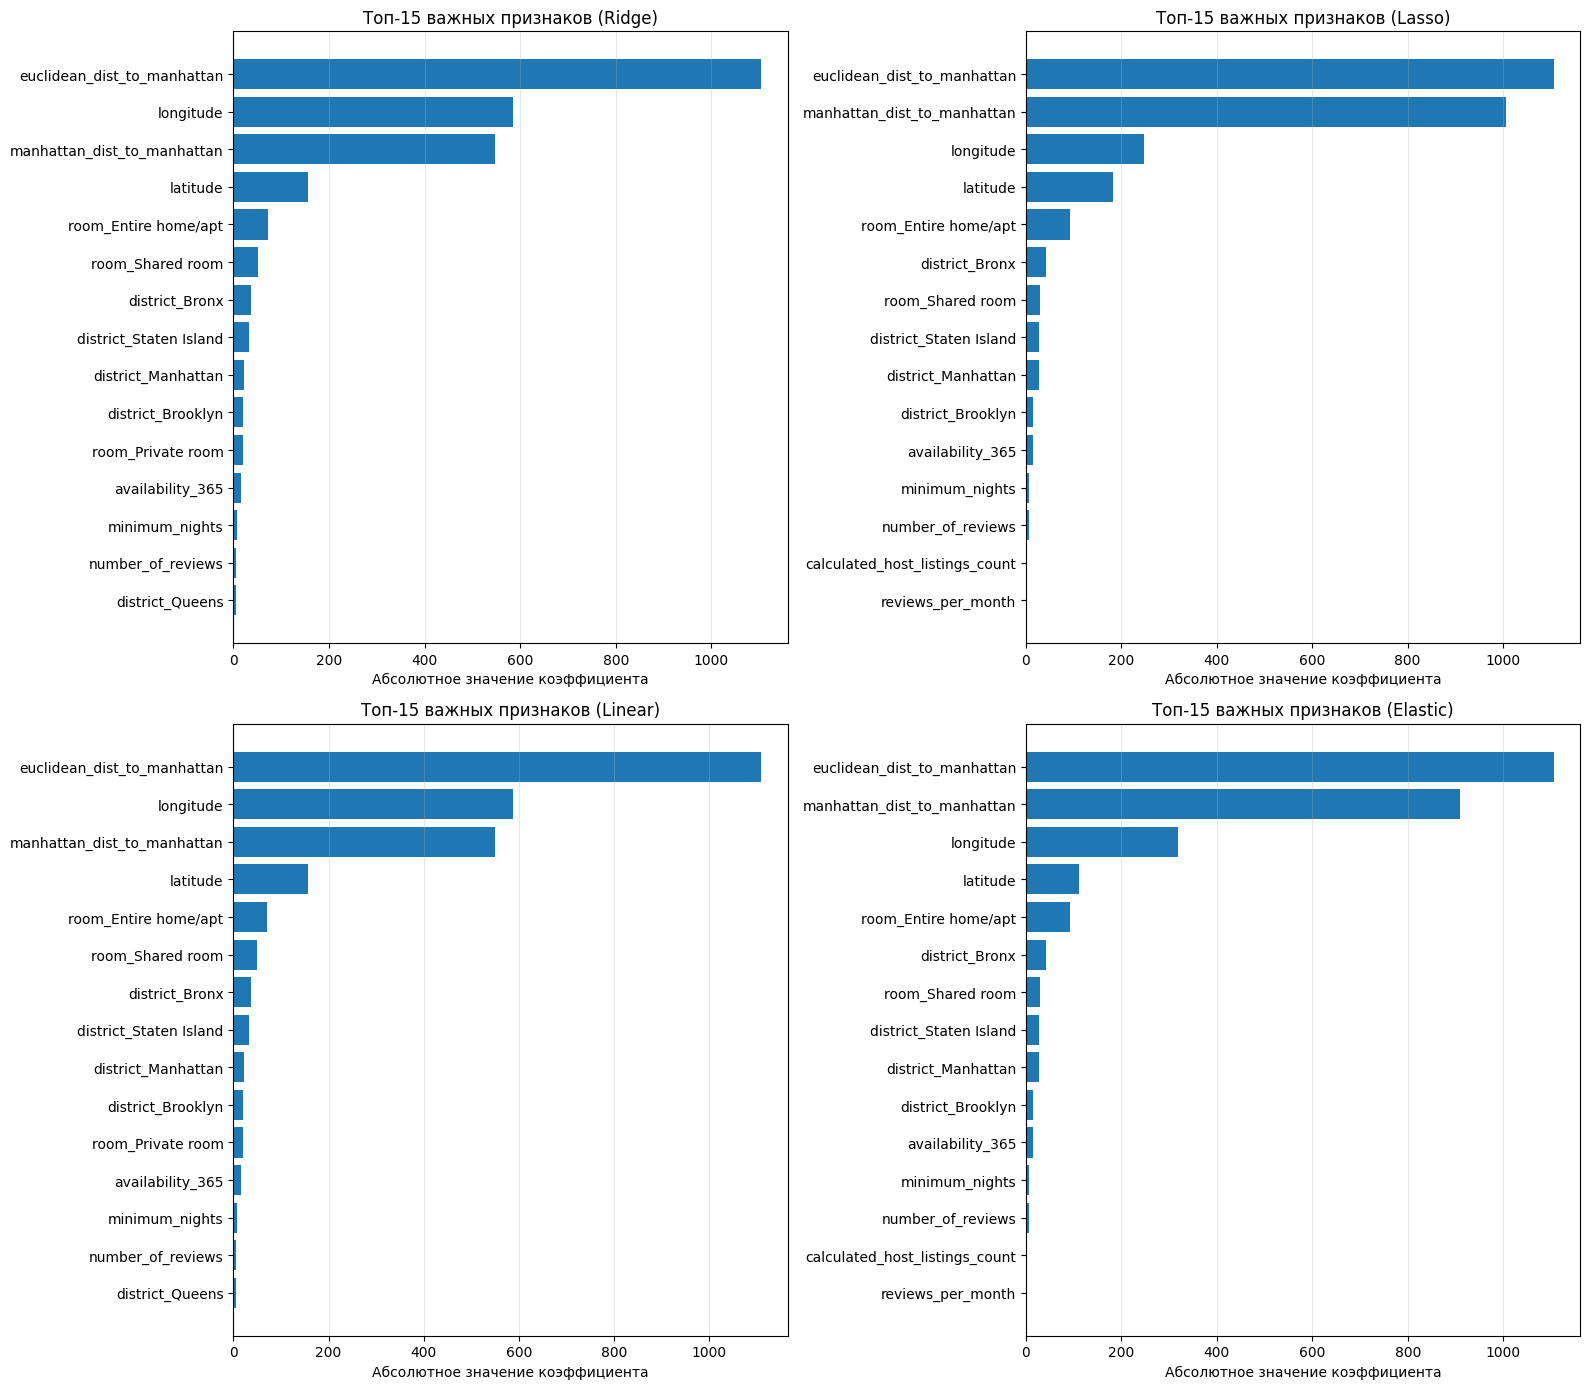

In [22]:
print("\n" + "="*60)
print("ВАЖНОСТЬ ПРИЗНАКОВ")
print("="*60)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Linear': linear_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_,
    'ElasticNet': elastic_model.coef_
})

feature_importance['Abs_Ridge'] = np.abs(feature_importance['Ridge'])
feature_importance['Abs_Lasso'] = np.abs(feature_importance['Lasso'])
feature_importance['Abs_Linear'] = np.abs(feature_importance['Linear'])
feature_importance['Abs_ElasticNet'] = np.abs(feature_importance['ElasticNet'])

top_n = 15
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

ridge_top_features = feature_importance.sort_values('Abs_Ridge', ascending=False).head(top_n)

axes[0, 0].barh(range(len(ridge_top_features)), ridge_top_features['Abs_Ridge'])
axes[0, 0].set_yticks(range(len(ridge_top_features)))
axes[0, 0].set_yticklabels(ridge_top_features['Feature'])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Абсолютное значение коэффициента')
axes[0, 0].set_title(f'Топ-{top_n} важных признаков (Ridge)')
axes[0, 0].grid(axis='x', alpha=0.3)

lasso_top_features = feature_importance[feature_importance['Lasso'] != 0].sort_values('Abs_Lasso', ascending=False).head(top_n)
axes[0, 1].barh(range(len(lasso_top_features)), lasso_top_features['Abs_Lasso'])
axes[0, 1].set_yticks(range(len(lasso_top_features)))
axes[0, 1].set_yticklabels(lasso_top_features['Feature'])
axes[0, 1].invert_yaxis()
axes[0, 1].set_xlabel('Абсолютное значение коэффициента')
axes[0, 1].set_title(f'Топ-{top_n} важных признаков (Lasso)')
axes[0, 1].grid(axis='x', alpha=0.3)

linear_top_features = feature_importance.sort_values('Abs_Linear', ascending=False).head(top_n)

axes[1, 0].barh(range(len(linear_top_features)), linear_top_features['Abs_Linear'])
axes[1, 0].set_yticks(range(len(linear_top_features)))
axes[1, 0].set_yticklabels(linear_top_features['Feature'])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Абсолютное значение коэффициента')
axes[1, 0].set_title(f'Топ-{top_n} важных признаков (Linear)')
axes[1, 0].grid(axis='x', alpha=0.3)

elastic_top_features = feature_importance.sort_values('Abs_ElasticNet', ascending=False).head(top_n)

axes[1, 1].barh(range(len(elastic_top_features)), elastic_top_features['Abs_ElasticNet'])
axes[1, 1].set_yticks(range(len(elastic_top_features)))
axes[1, 1].set_yticklabels(elastic_top_features['Feature'])
axes[1, 1].invert_yaxis()
axes[1, 1].set_xlabel('Абсолютное значение коэффициента')
axes[1, 1].set_title(f'Топ-{top_n} важных признаков (Elastic)')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


Основной вклад вносят поля, связанные с широтой и долготой а также сконструированные поля расстояния до центра Манхеттана